# Ask Qustions
1. ### Where do the guests come from? 
2. ### How much do guests pay for a room per night? 
3. ### How does the price per night vary over the year? 
4. ### Which month have the highest number of cancelations? 

In [116]:
# for dealing with directory in operating system
import os 
import numpy as np
import pandas as pd 
#for visualizing
import matplotlib.pyplot as plt 
import seaborn as sns

## let's make some  discovering for our Dataset

In [117]:
# reading our dataset(csv_type)
df = pd.read_csv('hotel_bookings.csv')
# want to get the shape of our dataframe
print (''' shape of  the data frame is {} \n the number of rows = {}
 number of columns(features) = {}'''.format(df.shape,df.shape[0],df.shape[1]))

 shape of  the data frame is (119390, 32) 
 the number of rows = 119390
 number of columns(features) = 32


In [43]:
# lets's show sampel of our dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [121]:
# get the name of columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## cleaning our dataset

In [45]:
# check of nan values
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [46]:
# drop columns have nan values and I won't use them to answering my Question
df_nona =df.drop(['company','agent'], 1)

In [47]:
# fil othoer columns children & country
nan_replacements = {'children':0.0,'country':'Unknown'}
df_nona = df_nona.fillna(nan_replacements)

In [48]:
# check of nan values now again
df_nona.isnull().sum().sum()

0

In [49]:
# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
zero_guests = list(df_nona.loc[df_nona["adults"]+ df_nona["children"]+ df_nona["babies"]==0].index)
df_nona=df_nona.drop(df_nona.index[zero_guests])
print(len(zero_guests))
print(df_nona.shape)

180
(119210, 30)


# EDA


In [123]:
# we will split our Datast to three sub-datasets
# that spliting will make our mission more easier
# to do that we will use boolean conditions 
# frist sub-dataset to Resort Hotel & no canceled booking 
# second sub-dataset to City Hotel & no canceled booking 
# third sub-datset to Resort Hotel & City Hotel & no canceled booking
A=df_nona['hotel']=='Resort Hotel'
B=df_nona['is_canceled']==0
C=df_nona['hotel']=='City Hotel'
df_H1= df_nona.loc[A & B] 
df_H2= df_nona.loc[C & B]
full_data_guests = df_nona.loc[B] # only actual gusts

## Where do the guests come from? 

In [77]:
# we will answer for this Qustion for every hotel alone
# we will generate new dataframe has two columns (country,value_counts)
df_H1_guests_come_from=pd.DataFrame(df_H1['country'].value_counts())
df_H2_guests_come_from=pd.DataFrame(df_H2['country'].value_counts())

In [78]:
df_H1_guests_come_from.rename(columns={"country": "Number of Guests"}, inplace=True)
df_H2_guests_come_from.rename(columns={"country": "Number of Guests"}, inplace=True)
df_nocancel_guests_come_from.rename(columns={"country": "Number of Guests"}, inplace=True)

In [135]:
df_H1_guests_come_from_v=df_H1_guests_come_from.loc[df_H1_guests_come_from['Number of Guests']>50]
df_H2_guests_come_from_v=df_H2_guests_come_from.loc[df_H2_guests_come_from['Number of Guests']>100]
df_nocancel_guests_come_from_v=df_nocancel_guests_come_from.loc[df_nocancel_guests_come_from['Number of Guests']>50]

### visualizion

[Text(0, 0, 'PRT'),
 Text(0, 0, 'GBR'),
 Text(0, 0, 'ESP'),
 Text(0, 0, 'IRL'),
 Text(0, 0, 'FRA'),
 Text(0, 0, 'DEU'),
 Text(0, 0, 'CN'),
 Text(0, 0, 'NLD'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'BEL'),
 Text(0, 0, 'ITA'),
 Text(0, 0, 'BRA'),
 Text(0, 0, 'CHE'),
 Text(0, 0, 'POL'),
 Text(0, 0, 'SWE'),
 Text(0, 0, 'AUT'),
 Text(0, 0, 'ROU'),
 Text(0, 0, 'FIN'),
 Text(0, 0, 'RUS'),
 Text(0, 0, 'CHN'),
 Text(0, 0, 'NOR'),
 Text(0, 0, 'AUS'),
 Text(0, 0, 'DNK'),
 Text(0, 0, 'LUX')]

<Figure size 960x800 with 0 Axes>

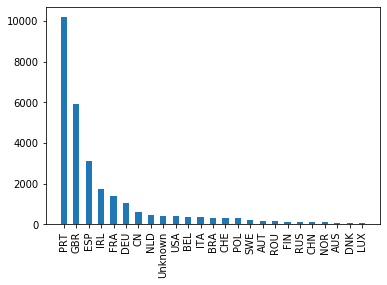

In [69]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
fig ,ax =plt.subplots()
plt.bar(df_H1_guests_come_from_v.index,df_H1_guests_come_from_v['Number of Guests'],width=0.5)
ax.set_xticklabels(df_H1_guests_come_from_v.index,rotation = 90)


[Text(0, 0, 'PRT'),
 Text(0, 0, 'GBR'),
 Text(0, 0, 'ESP'),
 Text(0, 0, 'IRL'),
 Text(0, 0, 'FRA'),
 Text(0, 0, 'DEU'),
 Text(0, 0, 'CN'),
 Text(0, 0, 'NLD'),
 Text(0, 0, 'Unknown'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'BEL'),
 Text(0, 0, 'ITA'),
 Text(0, 0, 'BRA'),
 Text(0, 0, 'CHE'),
 Text(0, 0, 'POL'),
 Text(0, 0, 'SWE'),
 Text(0, 0, 'AUT'),
 Text(0, 0, 'ROU'),
 Text(0, 0, 'FIN'),
 Text(0, 0, 'RUS'),
 Text(0, 0, 'CHN'),
 Text(0, 0, 'NOR'),
 Text(0, 0, 'AUS'),
 Text(0, 0, 'DNK'),
 Text(0, 0, 'LUX')]

<Figure size 960x800 with 0 Axes>

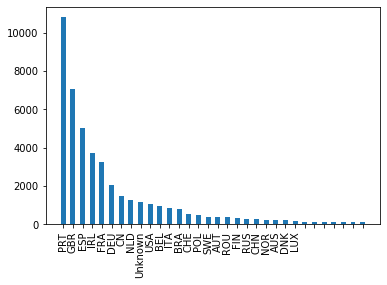

In [137]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
fig ,ax =plt.subplots()
plt.bar(df_H2_guests_come_from_v.index,df_H2_guests_come_from_v['Number of Guests'],width=0.5)
ax.set_xticklabels(df_H1_guests_come_from_v.index,rotation = 90)


## How much do guests pay for a room per night?
Both hotels have different room types and different meal arrangements. Seasonal factors are also important. So the prices vary a lot.
Since no currency information is given, but Portugal is part of the European Monetary Union, I assume that all prices are in EUR.

In [93]:
df_H1['adr_per_one']=df_H1['adr']/(df_H1['adults']+df_H1['children'])
df_H2['adr_per_one']=df_H2['adr']/(df_H2['adults']+df_H2['children'])

C:\Users\MahmoudJamil\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\MahmoudJamil\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
print("""From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(df_H1['adr_per_one'].mean(), df_H2['adr_per_one'].mean()))

From all non-cnceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


In [104]:
df_nona["adr_per_one"] = df_nona["adr"] / (df_nona["adults"] + df_nona["children"])
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_per_one"]].sort_values("reserved_room_type")

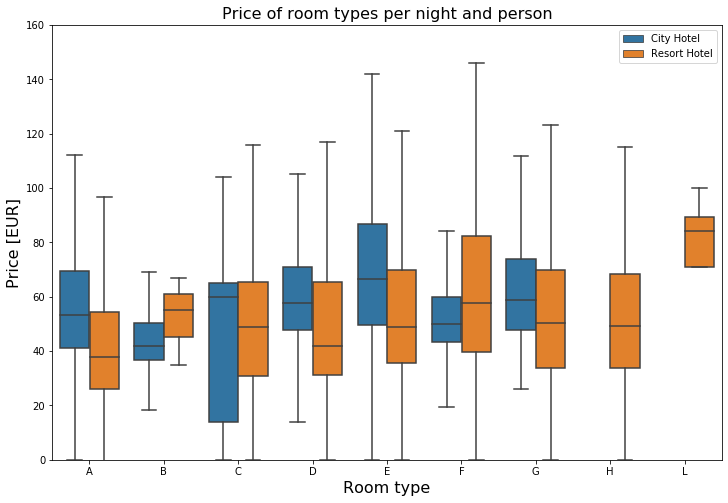

In [105]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_per_one",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

# How does the price per night vary over the year?

In [107]:
# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_per_one"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)


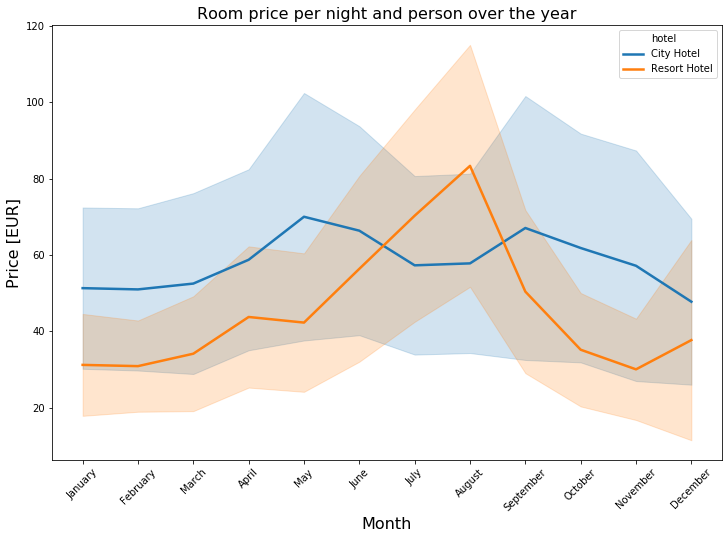

In [111]:

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_per_one", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

# How many bookings were canceled?

In [115]:
total_cancelations = df_nona["is_canceled"].sum()
rh_cancelations = df_nona.loc[df_nona["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = df_nona.loc[df_nona["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / df_nona.shape[0] * 100
rh_rel_cancel = rh_cancelations / df_nona.loc[df_nona["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / df_nona.loc[df_nona["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")


Total bookings canceled: 44,199 (37 %)
Resort hotel bookings canceled: 11,120 (28 %)
City hotel bookings canceled: 33,079 (42 %)
